In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics

In [4]:
df=pd.read_csv('Desktop/day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


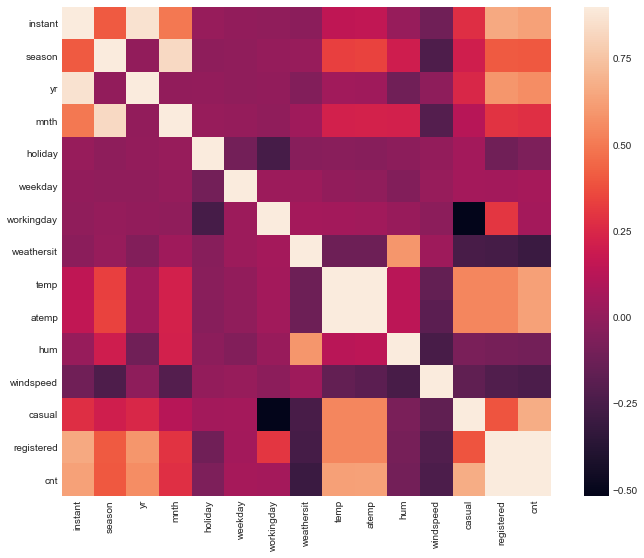

In [5]:
correlation = df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(correlation, vmax=0.9, square=True)

Text(0.5,1,'Number of bikes rented per season')

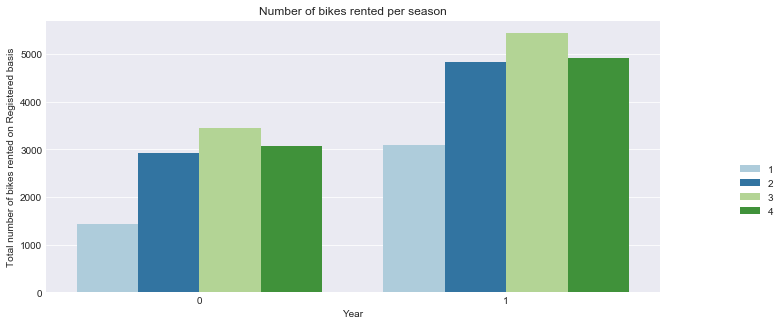

In [11]:
plt.figure(figsize=(11,5))
sns.barplot('yr','registered',hue='season', data=df,palette='Paired', ci=None)
plt.legend(loc='upper right',bbox_to_anchor=(1.2,0.5))
plt.xlabel('Year')
plt.ylabel('Total number of bikes rented on Registered basis')
plt.title('Number of bikes rented per season')

Text(0.5,1,'Number of bikes rented per season')

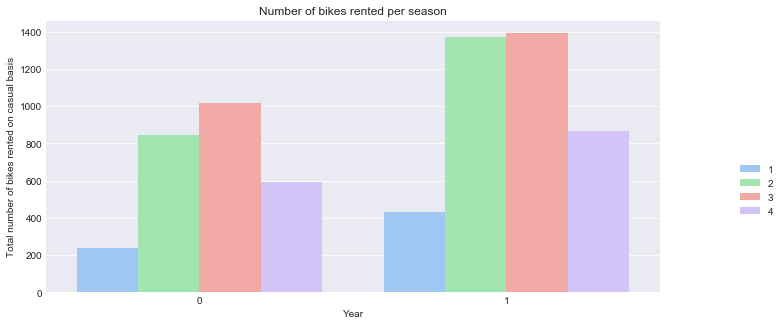

In [13]:
plt.figure(figsize=(11,5))
sns.barplot('yr','casual',hue='season', data=df,palette='pastel', ci=None)
plt.legend(loc='upper right',bbox_to_anchor=(1.2,0.5))
plt.xlabel('Year')
plt.ylabel('Total number of bikes rented on casual basis')
plt.title('Number of bikes rented per season')

from above graph we conclude that people rent bike more on casual basis than on registered basis

Text(0.5,1,'Number of bikes rented per year in different months')

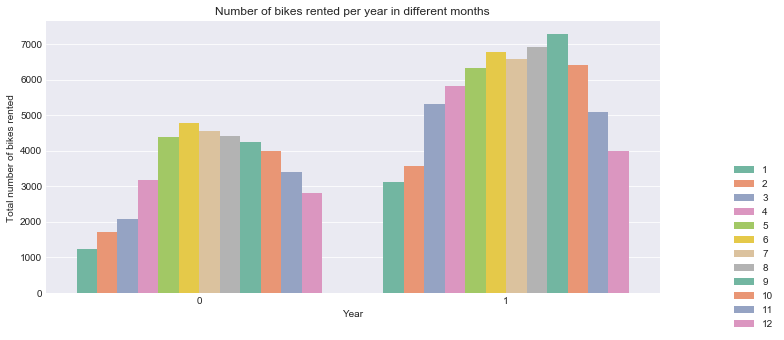

In [15]:
plt.figure(figsize=(11,5))
sns.barplot('yr','cnt',hue='mnth', data=df,palette='Set2', ci=None)
plt.legend(loc='upper right',bbox_to_anchor=(1.2,0.5))
plt.xlabel('Year')
plt.ylabel('Total number of bikes rented ')
plt.title('Number of bikes rented per year in different months')

Text(0.5,1,'Number of bikes rented per year in different months on violin plot')

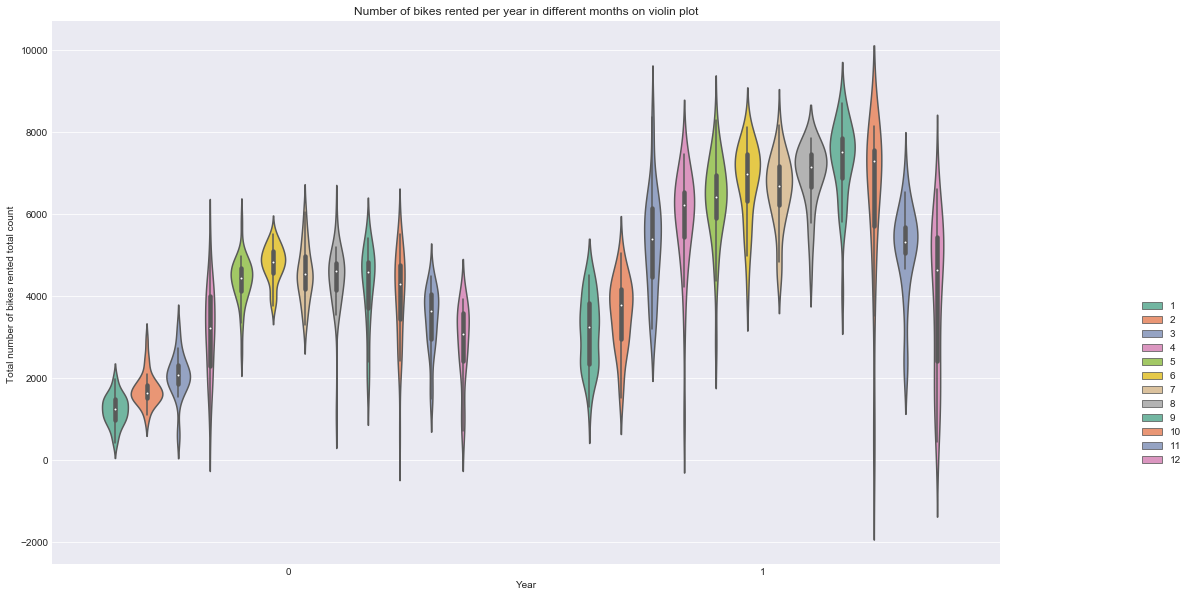

In [25]:
plt.figure(figsize=(17,10))
ax = sns.violinplot(x="yr", y="cnt", hue="mnth",data=df, palette="Set2", split=False)
plt.legend(loc='upper right',bbox_to_anchor=(1.2,0.5))
plt.xlabel('Year')
plt.ylabel('Total number of bikes rented total count ')
plt.title('Number of bikes rented per year in different months on violin plot')

Text(0.5,1,'Number of bikes rented per year in different months')

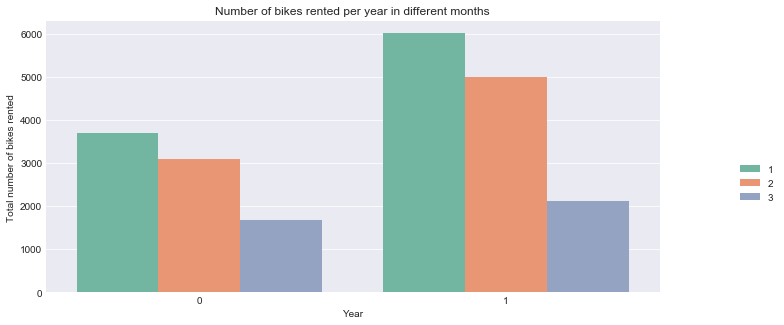

In [28]:
plt.figure(figsize=(11,5))
sns.barplot('yr','cnt',hue='weathersit', data=df,palette='Set2', ci=None)
plt.legend(loc='upper right',bbox_to_anchor=(1.2,0.5))
plt.xlabel('Year')
plt.ylabel('Total number of bikes rented ')
plt.title('Number of bikes rented per year in different months')

Text(0.5,1,'Distribution of total number of bikes rented')

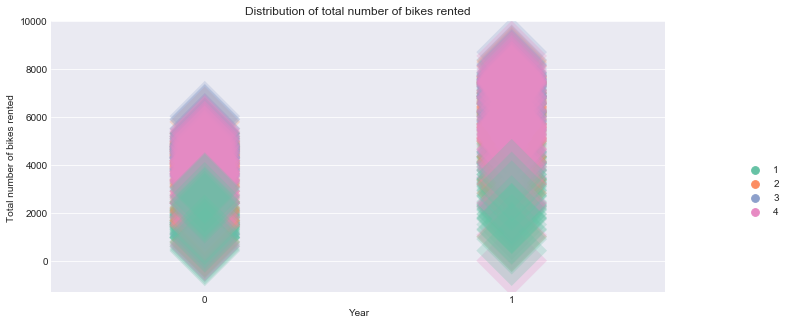

In [35]:
plt.figure(figsize=(11,5))
ax =  sns.stripplot("yr", "cnt", "season", data=df,palette="Set2", size=50, marker="D",edgecolor="gray", alpha=.25)
plt.legend(loc='upper right',bbox_to_anchor=(1.2,0.5))
plt.xlabel('Year')
plt.ylabel('Total number of bikes rented ')
plt.title('Distribution of total number of bikes rented based on the season')

Text(0.5,1,'Distribution of total number of bikes rented')

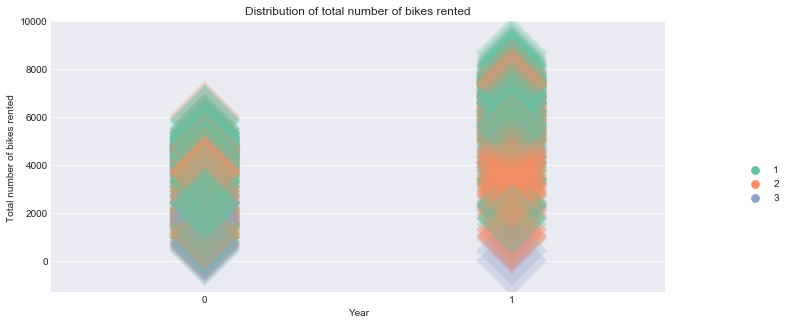

In [38]:
plt.figure(figsize=(11,5))
ax =  sns.stripplot("yr", "cnt", "weathersit", data=df,palette="Set2", size=50, marker="D",edgecolor="gray", alpha=.25)
plt.legend(loc='upper right',bbox_to_anchor=(1.2,0.5))
plt.xlabel('Year')
plt.ylabel('Total number of bikes rented ')
plt.title('Distribution of total number of bikes rented based on the weathersit')

# from above two plots it was concluded that max number of bikes were rented in winter season(4) when weathersit was Clear, Few clouds, Partly cloudy, Partly cloudy(1) for the year 2012

# Let's investigte the the year 2012 

In [70]:
#dividing the frame into year frame of two different year
df_2011=df[:365] #data frame of year 2011
#plotting the graph again
new_2011=df_2011.groupby('mnth').mean()['cnt'].values
print(new_2011)



df_2012=df[366:] #data frame of year 2012
#plotting the graph again
new_2012=df_2012.groupby('mnth').mean()['cnt'].values
print(new_2012)







mnth
1     1231.903226
2     1721.964286
3     2065.967742
4     3162.333333
5     4381.322581
6     4783.733333
7     4559.387097
8     4409.387097
9     4247.266667
10    3984.225806
11    3405.566667
12    2816.870968
Name: cnt, dtype: float64
[ 3148.33333333  3556.44827586  5318.5483871   5807.46666667  6318.22580645
  6761.          6567.96774194  6919.4516129   7285.76666667  6414.22580645
  5088.8         3990.74193548]


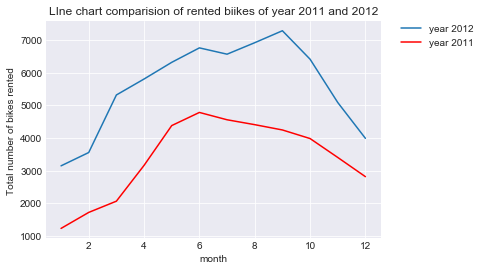

In [79]:
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],new_2012 ,label="year 2012")
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],new_2011,color='red',label="year 2011")
plt.xlabel('month')
plt.ylabel('Total number of bikes rented ')
plt.title('LIne chart comparision of rented biikes of year 2011 and 2012')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

From the above linne graph it was observed, that there was a significant rise in the total rented bikes for the year 2012 as compared to year 2011. But there is a huge drop in the rented bikes in 2012 starting from september to december as compared to the same month in 2011

plot graph of 2012 from sept to december on season , weathersit, working days etc parameters

Graph plot of september month year 2012

In [102]:
september_2012=df[609:639] #data frame of september 2012
october_2012=df[639:670] #data frame of october 2012
november_2012=df[670:700] #data frame of november 2012
december_2012=df[700:] #data frame of december 2012


#print(october_2012)

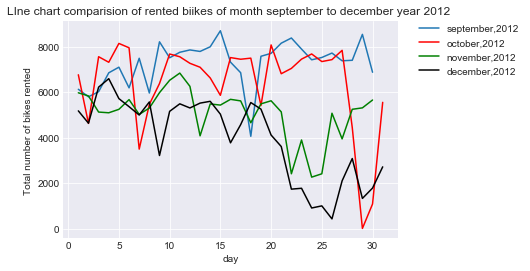

In [106]:
day_30=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
day_31=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]

plt.plot(day_30,september_2012['cnt'] ,label="september,2012")

plt.plot(day_31,october_2012['cnt'] ,label="october,2012",color="red")

plt.plot(day_30,november_2012['cnt'] ,label="november,2012",color="green")

plt.plot(day_31,december_2012['cnt'] ,label="december,2012",color="black")


plt.xlabel('day')
plt.ylabel('Total number of bikes rented ')
plt.title('LIne chart comparision of rented biikes of month september to december year 2012 ')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

We can see that there was a huge drop in bikes frequency on october-29-2012

# As the dataset is a real time dataset,On investigating the date October-29-2012 , Washington it was found that on this particular day washington was hit by a sandy hurricane and hence there for there was a huge drop in the count of rented bikes

check the new article here : https://www.telegraph.co.uk/news/worldnews/northamerica/usa/9642980/Hurricane-Sandy-October-29-as-it-happened.html

IF you find this notebook informative please upvote the analysis work. Suggestions are welcome for the improvement ... Do give a reference in your analysis work..Thanks for joinng...